##### This notebook focuses EDA 
##### TicketMaster data which involves the following:
        working with date-time columns
        exploring the various columns in the data

##### Yelp data which involves:
        merging the venue ratings and POI ratings data
        exploring the data frames for the yelp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ticket master Data

### Pre-processing

In [2]:
TicketMaster_data=pd.read_csv('TicketMaster_merged.csv')

In [3]:
TicketMaster_data.head()

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility
0,Matt Weidinger,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-21T00:00:00Z,Farm League Brewing,Cambridge,Ontario,295 Ainslie Street S,43.351280,-80.313180,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
1,"Enterprise Earth w/ Inferi, Crown Magnetar & T...",Rock,2024-04-20,18:00:00,America/Edmonton,2024-04-21T00:00:00Z,Dickens Pub,Calgary,Alberta,1000 9th Avenue SW,51.045486,-114.083990,This event is 18 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
2,Now In Service,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-25T00:00:00Z,Under the Neon Palms at the El Mocambo,Toronto,Ontario,464 Spadina Avenue,43.657580,-79.400200,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
3,House of Summon Presents: Woo York Live (After...,Dance/Electronic,2024-04-20,22:00:00,America/Toronto,2024-04-21T02:00:00Z,Grand Bizarre Exhibition Place,Toronto,Ontario,15 Saskatchewan Rd,43.632598,-79.423739,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
4,Korpiklaani w/ Visions of Atlantis & ILLUMISHADE,Metal,2024-04-20,18:00:00,America/Edmonton,2024-04-21T00:00:00Z,The Starlite Room,Edmonton,Alberta,10030 – 102 Street,53.546218,-113.490371,NaN,No ticket limit information available,NaN,NaN,NaN


In [4]:
TicketMaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Event_name          1806 non-null   object 
 1   Event_type          1805 non-null   object 
 2   Event_dates         1806 non-null   object 
 3   Event_start_times   1773 non-null   object 
 4   Event_time_zone     1806 non-null   object 
 5   Purchase_end_dates  1785 non-null   object 
 6   Venues              1806 non-null   object 
 7   City                1806 non-null   object 
 8   States              1806 non-null   object 
 9   Address             1806 non-null   object 
 10  Latitude            1804 non-null   float64
 11  Longitude           1804 non-null   float64
 12  Additional_info     1042 non-null   object 
 13  Ticket_limits       1381 non-null   object 
 14  Age_restrictions    1255 non-null   object 
 15  Parking             937 non-null    object 
 16  Accesi

##### We see that there are numerous columns with null values and we are going to try to deal with the null values in the following coloumns :
        1) Event_type
        2) Event_start_times
        3) Purchase_end_dates
        4) Latitude, longitude
        5) Age_restrictions

##### Other columns with null values are extra information that do not affect the model we are trying to build 


In [5]:
TicketMaster_data['Event_time_zone'].unique()
# convert the unknown from the state available in the data frame
# after exploring the cities in the timezones, the errors can be corrected

array(['America/Toronto', 'America/Edmonton', 'America/Vancouver',
       'America/Winnipeg', 'America/New_York', 'America/Denver',
       'America/Montreal', 'America/Los_Angeles', 'Unknown',
       'America/Chicago', 'America/Swift_Current', 'America/Halifax',
       'Europe/Istanbul', 'America/Regina', 'America/St_Johns'],
      dtype=object)

In [6]:
# check cities in all timezones
events= TicketMaster_data[TicketMaster_data['Event_time_zone'] == 'America/Denver']

# Print the cities of events in the time zone
for city in events['City'].unique():
    print(city)

Calgary
Edmonton


In [7]:
# replace the errors found in  mapping_dict back in the main data frame 
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Denver', 'America/Edmonton')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/New_York', 'America/Toronto')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Montreal', 'America/Toronto')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Los_Angeles', 'America/Vancouver')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Chicago', 'America/Winnipeg')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Swift_Current', 'America/Regina')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('Europe/Istanbul', 'America/Toronto')

In [8]:
mapping_dict={'Ville de Québec':'Quebec',
              'Québec City':'Quebec',
              'Québec':'Quebec',
              'Quebec City':'Quebec',
              'Sainte-Thérèse':'Sainte-Therese',
              'toronto':'Toronto',
              'Trois-Rivières':'Trois-Rivieres',
              'Sault Sainte Marie':'Sault Ste. Marie',
              'Sault Ste Marie':'Sault Ste. Marie',
              "St. John's":"St Johns'",
              "St John's":"St Johns'",
              "Saint John's":"St Johns'",
              "Saint Catharines":'St.Catharines',
              'St Catharines':'St.Catharines',
              'St. Catharines':'St.Catharines',              
              'Greater Sudbury':'Sudbury',
              'Greater Vancouver A':'Vancouver',
              'OTTAWA':'Ottawa' ,
              'Montr??al':'Montreal',
              'Montréal':'Montreal',
              'GATINEAU':'Gatineau'
             }

In [9]:
# Replace 'Montr??al' with 'Montreal' in the 'City' column of the DataFrame
TicketMaster_data['City'] = TicketMaster_data['City'].replace(mapping_dict)


In [10]:
TicketMaster_data['City'].unique()

array(['Cambridge', 'Calgary', 'Toronto', 'Edmonton', 'Vernon',
       'Winnipeg', 'Vancouver', 'Oshawa', 'Kitchener', 'Ottawa',
       'Montreal', 'Hamilton', 'Niagara Falls', 'Victoria', 'Kelowna',
       'Red Deer', 'Laval', 'Peterborough', 'Sudbury', 'Saskatoon',
       'London', 'St.Catharines', 'Kamloops', 'Gatineau', 'Laprairie',
       'Quebec', 'Brossard', 'Moncton', 'Pickering', 'Windsor',
       'Brampton', 'Halifax', 'Kindersley', 'Rama', 'Thunder Bay',
       'Burnaby', 'Enoch', 'St. Johns', 'Nepean', 'Kanata', 'Abbotsford',
       'Coquitlam', 'Penticton', 'Dawson Creek', 'Coaldale', 'Mission',
       'Regina', 'Kingston', 'Sault Ste. Marie', 'Mississauga ', 'Surrey',
       'Bonnyville', 'Cochrane', 'Whistler', 'Oakville', 'Boisbriand',
       'Summerside', 'Brandon', 'Trois-Rivieres', 'Mississauga',
       'Belleville', 'Brantford', 'Dieppe', 'Membertou', 'Gloucester',
       'Singhampton', 'Ancaster', 'Orangeville', 'Sydney', 'St Adolphe',
       'Severn', 'Brigden', '

In [11]:
# To create a mapping dictionary 
mapping_dict_time={}
for index, row in TicketMaster_data[['City', 'Event_time_zone']].drop_duplicates().iterrows():
    city = row['City']
    timezone = row['Event_time_zone']
    if city in mapping_dict_time :
        if timezone != 'Unknown':
             mapping_dict_time[city] = timezone  
    else:
        if timezone == 'Unknown':
             mapping_dict_time[city] = 'N/A' # for it to recognise in pandas
        else:
            mapping_dict_time[city] = timezone
#mapping_dict_time

In [12]:
# Replace the unknown values using mapping_dict_time
# Iterate over the DataFrame
for index, row in TicketMaster_data.iterrows():
    city = row['City']
    timezone = row['Event_time_zone']
    
    # Check if the timezone is unknown and if the city is in the mapping_dict
    if timezone == 'Unknown' and city in mapping_dict_time:
        # Replace the unknown timezone with the corresponding timezone from mapping_dict
        TicketMaster_data.at[index, 'Event_time_zone'] = mapping_dict_time[city]

In [13]:
TicketMaster_data.groupby('Event_time_zone')['Event_time_zone'].count()

Event_time_zone
America/Edmonton      273
America/Halifax        51
America/Regina         33
America/St_Johns        2
America/Toronto      1030
America/Vancouver     212
America/Winnipeg      200
N/A                     5
Name: Event_time_zone, dtype: int64

In [14]:
# since its only 6 rows of data with unknown timezone and that data has a lot of missing values we can just drop those rows

TicketMaster_data=TicketMaster_data.drop(TicketMaster_data[TicketMaster_data['Event_time_zone']=='N/A'].index)

In [15]:
TicketMaster_data['Purchase_end_dates'].isna().sum()

21

In [16]:
# Change the purchase end datetime object into the timezone provided 
new_time_zone=[]
import pytz
from datetime import datetime

for index,row in TicketMaster_data.iterrows():
    date_str=row['Purchase_end_dates'] #type object
    time_zone=row['Event_time_zone'] # type object
    
    if pd.notna(date_str):  # Check if the date string is not 'NaN 
    # Convert the datetime string to a datetime object
        datetime_obj_utc = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')

    # Normalize to UTC timezone before converting to the required timezone
        datetime_obj_utc=datetime_obj_utc.replace(tzinfo=pytz.utc) 

     # Define the event time zone
        event_timezone = pytz.timezone(time_zone)

    # Convert the purchase end date to the event time zone
        Purchase_End_Date = datetime_obj_utc.astimezone(event_timezone)
    
    # Convert the purchase end date to a string without timezone information
        purchase_end_date_str = Purchase_End_Date.strftime('%Y-%m-%d %H:%M:%S')

    # Append the datetime object without timezone to the list
        new_time_zone.append(purchase_end_date_str)
    else:
        new_time_zone.append(None)  # Append None if date_str is 'N/A'




In [17]:
# Add the converted time zone back to the data frame
TicketMaster_data['Last_Purchase_Date']=new_time_zone



In [18]:
# change data types for the columns

TicketMaster_data['Event_name'] = TicketMaster_data['Event_name'].astype(str)
TicketMaster_data['Event_type'] = TicketMaster_data['Event_type'].astype(str)
TicketMaster_data['Event_dates'] = pd.to_datetime(TicketMaster_data['Event_dates'])
TicketMaster_data['Event_start_times'] = pd.to_datetime(TicketMaster_data['Event_start_times'], format='%H:%M:%S').dt.time
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].astype(str)
TicketMaster_data['Purchase_end_dates'] = pd.to_datetime(TicketMaster_data['Purchase_end_dates'])
TicketMaster_data['Venues'] = TicketMaster_data['Venues'].astype(str)
TicketMaster_data['City'] = TicketMaster_data['City'].astype(str)
TicketMaster_data['States'] = TicketMaster_data['States'].astype(str)
TicketMaster_data['Address'] = TicketMaster_data['Address'].astype(str)
TicketMaster_data['Latitude'] = TicketMaster_data['Latitude'].astype(float)
TicketMaster_data['Longitude'] = TicketMaster_data['Longitude'].astype(float)
TicketMaster_data['Additional_info'] = TicketMaster_data['Additional_info'].astype(str)
TicketMaster_data['Ticket_limits'] = TicketMaster_data['Ticket_limits'].astype(str)
TicketMaster_data['Age_restrictions'] = TicketMaster_data['Age_restrictions'].astype(bool)
TicketMaster_data['Parking'] = TicketMaster_data['Parking'].astype(str)
TicketMaster_data['Accesibility'] = TicketMaster_data['Accesibility'].astype(str)
TicketMaster_data['Last_Purchase_Date']=pd.to_datetime(TicketMaster_data['Last_Purchase_Date'])

In [19]:
TicketMaster_data[TicketMaster_data['Event_start_times'].isna()]

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Last_Purchase_Date
838,COAST CITY COUNTRY Two Day Pass,Country,2024-04-19,NaT,America/Vancouver,2024-04-20 04:00:00+00:00,BC Place,Vancouver,British Columbia,777 Pacific Blvd.,49.276069,-123.112712,nan,There is an overall 8 ticket limit for this ev...,False,Pay parking lots are located adjacent to BC Pl...,Wheelchair seating is located on Levels 2 & 4 ...,2024-04-19 21:00:00
1087,2024 Speedo Canadian Swimming Open/omnium Cana...,Sports,2024-04-10,NaT,America/Toronto,2024-04-14 03:30:00+00:00,Toronto Pan Am Sports Centre,Toronto,Ontario,Military Trail and Morningside Avenue,43.789302,-79.194417,nan,nan,False,nan,nan,2024-04-13 23:30:00
1168,2024 Telus Cup - Full Tournament Package,Sports,2024-04-22,NaT,America/Halifax,2024-04-28 21:00:00+00:00,Membertou Sports & Wellness Centre,Membertou,Nova Scotia,95 Autwen Ma'sl Awti,46.121566,-60.186751,"Capacity: 1,350 / Capacité : 1 350",nan,False,nan,nan,2024-04-28 18:00:00
1212,2024 World Para Ice Hockey Championship - Full...,Sports,2024-05-04,NaT,America/Edmonton,2024-05-12 23:30:00+00:00,WinSport Event Centre,Calgary,Alberta,88 Canada Olympic Road SW,51.082382,-114.215273,nan,nan,False,Ample parking is available on site. There may ...,WinSport is fully wheelchair accessible with a...,2024-05-12 17:30:00
1231,2024 World Para Ice Hockey Championship - Meda...,Sports,2024-05-10,NaT,America/Edmonton,2024-05-12 23:30:00+00:00,WinSport Event Centre,Calgary,Alberta,88 Canada Olympic Road SW,51.082382,-114.215273,Medal round package gives you access to the se...,nan,False,Ample parking is available on site. There may ...,WinSport is fully wheelchair accessible with a...,2024-05-12 17:30:00
1250,Passe pour l'évènement complet (7 jours) / Ful...,Sports,2024-05-13,NaT,America/Toronto,2024-05-20 01:00:00+00:00,Centre sportif du Parc olympique,Montreal,Quebec,3200 Rue Viau,45.559972,-73.551438,La passe pour l'événement complet vous donne a...,nan,False,nan,nan,2024-05-19 21:00:00
1255,Toronto Ultra Major III Powered by Bell - 4-Da...,Sports,2024-05-16,NaT,America/Toronto,2024-05-19 18:00:00+00:00,Mattamy Athletic Centre,Toronto,Ontario,50 Carlton Street,43.662182,-79.380370,"Net Capacity: 2,560 Must be 17+ unless accompa...",nan,False,There are several paid public parking lots in ...,The Mattamy Athletic Centre has Accessible Sea...,2024-05-19 14:00:00
1261,Passe pour la fin de semaine (3 jours) - Weeke...,Sports,2024-05-17,NaT,America/Toronto,2024-05-20 01:00:00+00:00,Centre sportif du Parc olympique,Montreal,Quebec,3200 Rue Viau,45.559972,-73.551438,La passe pour la fin de semaine vous donne acc...,nan,False,nan,nan,2024-05-19 21:00:00
1316,RBCCO Early Week Any One Day - Tues or Wed,Sports,2024-05-28,NaT,America/Toronto,2024-05-29 22:00:00+00:00,Hamilton Golf and Country Club,Ancaster,Ontario,232 Golf Links Road,43.221489,-79.976978,"Net capacity: (20,000)",There is an 8 ticket limit for this event.,False,Please follow the signs for parking More infor...,Accessible Viewing: Private viewing areas on t...,2024-05-29 18:00:00
1367,Canadian Grand Prix,Sports,2024-06-09,NaT,America/Toronto,2024-06-10 03:59:20+00:00,Circuit Gilles-Villeneuve,Montreal,Quebec,1 Circuit Gilles Villeneuve,0.000000,0.000000,nan,nan,True,nan,nan,2024-06-09 23:59:20


#### from the dataframe we are going to use the time information in the purchase end dates to fill the start time information 


In [20]:
for index,row in TicketMaster_data.iterrows():
     # Check if 'Event_start_times' is NaN and 'Converted_Purchase_end_dates' is not NaT
    if pd.isna(row['Event_start_times']) and not pd.isna(row['Last_Purchase_Date']):
        TicketMaster_data.at[index, 'Event_start_times'] = row['Last_Purchase_Date'].time()
    

In [21]:
# drop the old purchase_end_dates column
TicketMaster_data.drop(columns='Purchase_end_dates', inplace=True)


In [22]:
TicketMaster_data[TicketMaster_data['Event_start_times'].isna()]

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Last_Purchase_Date
1454,PWHL Season Tickets,Sports,2024-01-01,NaT,America/Toronto,Mattamy Athletic Centre,Toronto,Ontario,50 Carlton Street,43.662182,-79.38037,Net Capacity: 2740,There is an 8 ticket limit for this event.,False,There are several paid public parking lots in ...,The Mattamy Athletic Centre has Accessible Sea...,NaT


In [23]:
# Since there is only one row of data with no event start times we can drop that row
TicketMaster_data=TicketMaster_data.drop(TicketMaster_data[TicketMaster_data['Event_start_times']=='NaT'].index)

#### We saw that age_restrictions has some null values Check for age restrictions information in additional info and make changes to the data accordingly.
I will use NLTK library to parse the string and look for relevant tokens ( numbers (18,19) ,'and older','+','plus','no minors')

In [24]:
TicketMaster_data['Age_restrictions'].unique()

array([ True, False])

In [25]:
import nltk
import re
import numpy as np

# Assuming TicketMaster_data is your DataFrame and 'Info' is the column containing text data
# Import NLTK's word_tokenize and FreqDist
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer
#nltk.download('punkt')

# Define a function to extract digits and detect keywords
def extract_digits_and_detect_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    items_to_check = ['and over', '+', 'plus', 'nominors']
    
    # Initialize boolean values for digits and keywords
    has_digits = any(token.isdigit() for token in tokens)
    # Check if any of the items in the list are present in the tokens
    # Lowercase the text for case-insensitive comparison
    text_lower = text.lower()
    
    # Check if any of the items in the list are present in the text
    # This checks for phrases in the original text
    has_keywords = any(item in text_lower for item in items_to_check)
    
    return has_digits, has_keywords

# Define a function to apply the extraction and assign 'Age Restriction'
def apply_extraction(row):
    # Check if 'Additional_info' is NaN without altering existing 'Age_restrictions' values
    if pd.isnull(row['Additional_info']):
        # If 'Age_restrictions' is NaN, then set it to False, otherwise leave it as is
        if pd.isnull(row['Age_restrictions']):
            row['Age_restrictions'] = False
        # No further action needed if 'Age_restrictions' already has a value
    else:
        has_digits, has_keywords = extract_digits_and_detect_keywords(row['Additional_info'])
        
        # Check if both digits and keywords are present
        if has_digits and has_keywords:
            row['Age_restrictions'] = True
        else:
            row['Age_restrictions'] = False
    
    return row
    
# Apply the extraction function to each row
TicketMaster_data= TicketMaster_data.apply(apply_extraction, axis=1)


In [26]:
TicketMaster_data.head()

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Last_Purchase_Date
0,Matt Weidinger,Rock,2024-04-20,20:00:00,America/Toronto,Farm League Brewing,Cambridge,Ontario,295 Ainslie Street S,43.351280,-80.313180,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 20:00:00
1,"Enterprise Earth w/ Inferi, Crown Magnetar & T...",Rock,2024-04-20,18:00:00,America/Edmonton,Dickens Pub,Calgary,Alberta,1000 9th Avenue SW,51.045486,-114.083990,This event is 18 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 18:00:00
2,Now In Service,Rock,2024-04-20,20:00:00,America/Toronto,Under the Neon Palms at the El Mocambo,Toronto,Ontario,464 Spadina Avenue,43.657580,-79.400200,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-24 20:00:00
3,House of Summon Presents: Woo York Live (After...,Dance/Electronic,2024-04-20,22:00:00,America/Toronto,Grand Bizarre Exhibition Place,Toronto,Ontario,15 Saskatchewan Rd,43.632598,-79.423739,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 22:00:00
4,Korpiklaani w/ Visions of Atlantis & ILLUMISHADE,Metal,2024-04-20,18:00:00,America/Edmonton,The Starlite Room,Edmonton,Alberta,10030 – 102 Street,53.546218,-113.490371,nan,No ticket limit information available,False,nan,nan,2024-04-20 18:00:00


In [27]:
TicketMaster_data['Age_restrictions'].unique()

array([ True, False])

### EDA Visuals

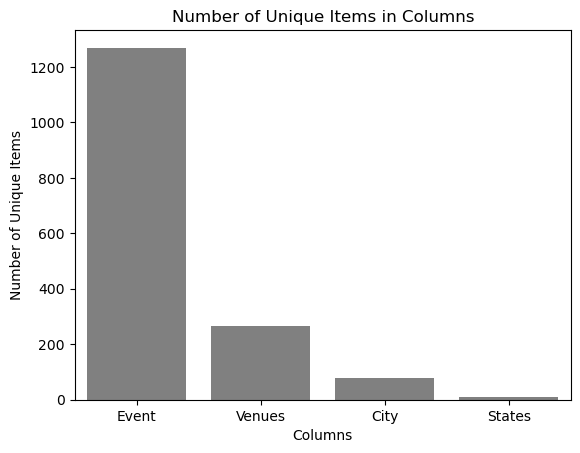

In [28]:
warnings.filterwarnings('ignore')
figsize=(10,20)
unique_events= len(TicketMaster_data['Event_name'].unique())
unique_venues = len(TicketMaster_data['Venues'].unique())
unique_cities = len(TicketMaster_data['City'].unique())
unique_states = len(TicketMaster_data['States'].unique())

# Plot the number of unique items in each column
sns.barplot(x=['Event','Venues', 'City', 'States'], y=[unique_events,unique_venues, unique_cities, unique_states],color='grey')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Items')
plt.title('Number of Unique Items in Columns')
plt.show()

##### This plot shows the span of the events over the venues,city and states in Canada

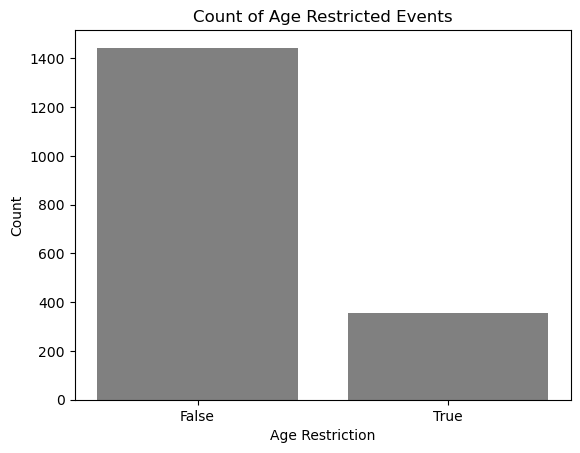

In [29]:
age_restrictions_count=TicketMaster_data['Age_restrictions'].value_counts()

plt.bar(age_restrictions_count.index, age_restrictions_count.values,color='grey')
plt.xlabel('Age Restriction')
plt.ylabel('Count')
plt.title('Count of Age Restricted Events')

# Set the x-axis tick labels to display 'True' and 'False'
# Reverse the index and set the x-axis tick labels accordingly
plt.xticks(age_restrictions_count.index[::-1], age_restrictions_count.index[::-1])

plt.show()

In [30]:
#to see the unique events present in our dataset
event_type_unique = TicketMaster_data['Event_type'].value_counts()
event_type_unique



Event_type
Sports               804
Rock                 312
Dance/Electronic     117
Pop                   85
Hip-Hop/Rap           78
Alternative           70
Metal                 60
Country               54
Other                 38
Undefined             37
World                 27
Folk                  26
Chanson Francaise     26
R&B                   25
Classical             16
Jazz                  11
Latin                  5
Blues                  4
Reggae                 2
Religious              2
Children's Music       1
nan                    1
Name: count, dtype: int64

#### Since we have undefined and other  as event_types we can combine them to create one category and there are 1 NaN items so we can drop those rows as this in a needed feature for the model we are building

In [31]:
# change the catergory of Undefined event type to Awards
TicketMaster_data.replace({'Event_type': {'Undefined': 'Other'}}, inplace=True)

# delete rows of data with NaN values
TicketMaster_data.dropna(subset=['Event_type'], axis=0, inplace=True)



In [32]:
TicketMaster_data.drop_duplicates().shape

(1801, 17)

In [33]:
# save the data to a csv
TicketMaster_data.to_csv('TM_data_EDA.csv',index=False)

## FourSquare venue ratings and ticket master venue rating

In [34]:
# read csv file
Venue_ratings=pd.read_csv('Venue_Ratings.csv')
Venue_ratings.head()


,venue,venue_id,city,reviews,user_id,user_name,ratings
0,Farm League Brewing,Not available,Cambridge,NaN,NaN,NaN,NaN
1,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,"Good food, great service. The wing night is a ...",hHdf-AX3pAf3JP4FqcF9SQ,Kevin L.,5.0
2,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,It's a cheap club with high prices. Expensive ...,JDH6z-L4xbxDRzUYMHASgw,Istomin Y.,1.0
3,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,Food was good and enjoyed are time while havin...,O-7nNGcrkeNKm5WoG2GJlA,Brian H.,4.0
4,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,"El mocambo? More like hell no nah bro. The ""El...",sdUc23Aeh7x-C2nePy1YJA,Joey L.,2.0


In [35]:
Venue_ratings['city']=Venue_ratings['city'].replace(mapping_dict)

In [36]:
TicketMaster_data.columns

Index(['Event_name', 'Event_type', 'Event_dates', 'Event_start_times',
       'Event_time_zone', 'Venues', 'City', 'States', 'Address', 'Latitude',
       'Longitude', 'Additional_info', 'Ticket_limits', 'Age_restrictions',
       'Parking', 'Accesibility', 'Last_Purchase_Date'],
      dtype='object')

In [37]:
TM_data=TicketMaster_data.drop(['Event_name', 'Event_dates', 'Event_start_times',
       'Event_time_zone', 'City', 'States',
       'Address', 'Latitude', 'Longitude', 'Additional_info', 'Ticket_limits',
       'Age_restrictions', 'Parking', 'Accesibility'],axis=1)

In [38]:
TM_data.shape

(1801, 3)

In [39]:
Venue_ratings.shape,Venue_ratings.drop_duplicates().shape

((18208, 7), (18208, 7))

In [40]:
Venue_ratings['user_id'].nunique(),pd.notna(Venue_ratings['ratings']).count()

(219, 18208)

In [41]:
# join the event type with the venue_ratings
Venue_ratings1=pd.merge(Venue_ratings,TM_data,left_on='venue',right_on='Venues',how='left')
Venue_ratings1.drop('Venues',inplace=True,axis=1)

In [42]:
Venue_ratings1.to_csv('Venue_Reviews.csv',index=False)

## Combine ratings information with the additional information information 

In [43]:
foursq_POI=pd.read_csv('FourSq_ratings.csv')
foursq_POI.head()

,venue,venue_id,city,reviews,user_id,user_name,ratings
0,The Grange,NaN,Toronto,NaN,NaN,NaN,NaN
1,Museum,GE1FgoNrgxPk04ZSlfF7mA,Vernon,This is one of the worst museums I have ever v...,KdjoBdWGyU1S7gcJ7CzSAg,Sandy C.,1.0
2,Museum,GE1FgoNrgxPk04ZSlfF7mA,Vernon,I didn't feel like there was anything special ...,XR-vgJX3LvdPDwNoEzWRkw,C C.,2.0
3,Museum,GE1FgoNrgxPk04ZSlfF7mA,Vernon,This is suppose to be a tourist attraction pla...,jpIGlAym6z88W2xzHiK5_A,Denise W.,1.0
4,Museum,GE1FgoNrgxPk04ZSlfF7mA,Vernon,I visited here for Tea Festival. The exhibitio...,JenVxVmS0Rmsf1MOpZPtEA,Mari E.,2.0


In [44]:
# replace city data
foursq_POI['city']=foursq_POI['city'].replace(mapping_dict)

In [45]:
foursq_POI['user_id'].nunique(), pd.notna(foursq_POI['ratings']).count()

(53, 1235)

In [46]:
# read csv file
foursq_data=pd.read_csv('FourSq_data.csv')
foursq_data.head()

,Venue,City,State,POI,Category,Address,Distance From Venue
0,Farm League Brewing,Cambridge,Ontario,NaN,NaN,NaN,NaN
1,Dickens Pub,Calgary,Alberta,NaN,NaN,NaN,NaN
2,Under the Neon Palms at the El Mocambo,Toronto,Ontario,The Grange,Museum,317 Dundas St W,759.0
3,Grand Bizarre Exhibition Place,Toronto,Ontario,NaN,NaN,NaN,NaN
4,The Starlite Room,Edmonton,Alberta,NaN,NaN,NaN,NaN


In [47]:
# change city data nad store back to csv file
foursq_data['City']=foursq_data['City'].replace(mapping_dict)

In [48]:
foursq_data[foursq_data['POI']=="The Grange"]

,Venue,City,State,POI,Category,Address,Distance From Venue
2,Under the Neon Palms at the El Mocambo,Toronto,Ontario,The Grange,Museum,317 Dundas St W,759.0
159,The Horseshoe Tavern,Toronto,Ontario,The Grange,Museum,317 Dundas St W,955.0
160,The Garrison,Toronto,Ontario,The Grange,Museum,317 Dundas St W,754.0
258,The Rivoli,Toronto,Ontario,The Grange,Museum,317 Dundas St W,515.0
299,The Palace Theatre (Formerly Flames Central),Calgary,Alberta,The Grange,Museum,317 Dundas St W,563.0


In [49]:
# Identify rows where 'POI' is "The Grange" and 'City' is "Calgary"
rows_to_update = (foursq_data['POI'] == "The Grange") & (foursq_data['City'] == "Calgary")

# Update the 'City' and 'State' values for those rows
foursq_data.loc[rows_to_update, 'City'] = "Toronto"
foursq_data.loc[rows_to_update, 'State'] = "Ontario"

In [50]:
foursq_data.to_csv('FourSq_data_EDA.csv',index=False)

In [51]:
# merge data on given columns
foursq_merged=pd.merge(foursq_POI,foursq_data,left_on=['venue','city'],right_on=['POI','City'])

In [52]:
foursq_merged.drop(['city', 'POI'], inplace=True, axis=1)

In [53]:
foursq_merged.head()

,venue,venue_id,reviews,user_id,user_name,ratings,Venue,City,State,Category,Address,Distance From Venue
0,The Grange,NaN,NaN,NaN,NaN,NaN,Under the Neon Palms at the El Mocambo,Toronto,Ontario,Museum,317 Dundas St W,759.0
1,The Grange,NaN,NaN,NaN,NaN,NaN,The Horseshoe Tavern,Toronto,Ontario,Museum,317 Dundas St W,955.0
2,The Grange,NaN,NaN,NaN,NaN,NaN,The Garrison,Toronto,Ontario,Museum,317 Dundas St W,754.0
3,The Grange,NaN,NaN,NaN,NaN,NaN,The Rivoli,Toronto,Ontario,Museum,317 Dundas St W,515.0
4,The Grange,NaN,NaN,NaN,NaN,NaN,The Palace Theatre (Formerly Flames Central),Toronto,Ontario,Museum,317 Dundas St W,563.0


In [54]:
foursq_merged.to_csv('FourSq_POI_reviews.csv',index=False)

In [55]:
# read csv file
yelp_POI=pd.read_csv('Yelp_rest_reviews.csv')
yelp_POI.head()

,venue,venue_id,reviews,user_id,user_name,ratings
0,Latinoamerica Unida,-tlUatScbE-dGR-GB2sy7Q,The best Mexican food in Cambridge and the KW ...,HDSAltBTaoTd7qkfNyxYfA,Phyllis L.,5.0
1,Latinoamerica Unida,-tlUatScbE-dGR-GB2sy7Q,We were walking along Grand River and one of l...,ktrlzYpMzrKYOu_ivP3_sA,Peter B.,5.0
2,Latinoamerica Unida,-tlUatScbE-dGR-GB2sy7Q,"We love going there, family oriented restauran...",ZC0203i_WXKezfVEtqX0pw,Frederick D.,4.0
3,Monigram Coffee Roasters,YI8t-hPHI79W4G36oWP05Q,Great selection of coffees and other beverages...,uvVdV5Bj64sVgnNBqbuDqg,Devin F.,5.0
4,Monigram Coffee Roasters,YI8t-hPHI79W4G36oWP05Q,The best spot for coffe in Cambridge. The exce...,HDSAltBTaoTd7qkfNyxYfA,Phyllis L.,5.0


In [56]:
yelp_POI['user_id'].nunique(), pd.notna(yelp_POI['ratings']).count()

(5866, 10820)

In [57]:
yelp_POI[yelp_POI['venue']=="Canmore River Adventures"	]

,venue,venue_id,reviews,user_id,user_name,ratings
9452,Canmore River Adventures,ck_NcKP2DbBCYPASRGViEA,What an excellent meal. No wonder this is one ...,VVyjFrfsYt1i9o3QkhIdGg,Dan B.,5.0
9453,Canmore River Adventures,ck_NcKP2DbBCYPASRGViEA,"The Rimrock delivers a friendly service, atten...",c0OdIvaMaGss8G1usrbmog,Charmaine L.,4.0
9454,Canmore River Adventures,ck_NcKP2DbBCYPASRGViEA,Quality fine dining with a comfortable but ele...,nkN_do3fJ9xekchVC-v68A,Jeremy S.,5.0


In [58]:
# read csv file
yelp_rest_data=pd.read_csv('Yelp_data_1.csv')
yelp_rest_data.head()

,Business ID,Name,Ratings,Pricing,Category,Distance_From_Venue,Address,City,State,Latitude,Longitude
0,-tlUatScbE-dGR-GB2sy7Q,Latinoamerica Unida,4.5,$$,Mexican,289.424219,18 Concession Street,Cambridge,ON,43.353800,-80.314570
1,YI8t-hPHI79W4G36oWP05Q,Monigram Coffee Roasters,4.8,$,Coffee & Tea,775.115965,16 Ainslie Street S,Cambridge,ON,43.358217,-80.314118
2,0Qh0SJjaiMTDf2-_k_fWVg,Red Basil Vietnamese Restaurant,4.1,$$,Vietnamese,839.357645,61 Main Street,Cambridge,ON,43.358760,-80.314000
3,m5qY9xHr1de8EpgqybBqDQ,Hungry Ninja,4.5,$$,Japanese,906.830416,5 Water St N,Cambridge,ON,43.359304,-80.315182
4,tkEHtf5jmqF3-uE2n7iJTA,Bombay Sizzler,3.9,$$,Indian,848.269779,110 Main Street,Cambridge,ON,43.359169,-80.312424


In [59]:
# replace city names and save file
yelp_rest_data['City']=yelp_rest_data['City'].replace(mapping_dict)
yelp_rest_data['State'].unique()

array(['ON', 'AB', 'BC', 'MB', 'QC', 'CA', 'SK', 'NB', 'MI', 'NS', 'NL',
       'PE'], dtype=object)

In [60]:
# drop columns where state is CA
yelp_rest_data.drop(yelp_rest_data[yelp_rest_data['State'] == 'CA'].index, inplace=True)


In [61]:
# merge dataframes on given columns
yelp_data_df=pd.merge(yelp_POI,yelp_rest_data,left_on='venue',right_on='Name')

In [62]:
# drop unnecessary columns
yelp_data_df.drop(['Business ID','Name','Ratings'],inplace=True,axis=1)

In [63]:
# check for duplicates
yelp_data_df.shape,yelp_data_df.drop_duplicates().shape

((29493, 14), (29493, 14))

In [64]:
# drop duplicates
yelp_data_df=yelp_data_df.drop_duplicates()

In [65]:
# rounding decimals to match columns to different data frame
yelp_data_df['Latitude']=yelp_data_df['Latitude'].round(decimals=1)
yelp_data_df['Longitude']=yelp_data_df['Longitude'].round(decimals=1)

In [66]:
# read csv file
venue_locations=pd.read_csv("Venue_locations.csv")
venue_locations.head()

,Venue,Address,City,State,latitude,longitude
0,Farm League Brewing,295 Ainslie Street S,Cambridge,Ontario,43.351280,-80.313180
1,Dickens Pub,1000 9th Avenue SW,Calgary,Alberta,51.045486,-114.083990
2,Under the Neon Palms at the El Mocambo,464 Spadina Avenue,Toronto,Ontario,43.657580,-79.400200
3,Grand Bizarre Exhibition Place,15 Saskatchewan Rd,Toronto,Ontario,43.632598,-79.423739
4,The Starlite Room,10030 – 102 Street,Edmonton,Alberta,53.546218,-113.490371


In [67]:
# rounding decimals to use data to match columns of different data frames
venue_locations['latitude']=venue_locations['latitude'].round(decimals=1)
venue_locations['longitude']=venue_locations['longitude'].round(decimals=1)

In [68]:
# rounding decimals to use data to match columns of different data frames
yelp_rest_data['Latitude']=yelp_rest_data['Latitude'].round(decimals=1)
yelp_rest_data['Longitude']=yelp_rest_data['Longitude'].round(decimals=1)

In [69]:
yelp_rest_data1=pd.merge(yelp_rest_data,venue_locations,left_on=['Latitude','City'],right_on=['latitude','City'],how='outer')

In [94]:
yelp_rest_data1['State_y'].fillna(yelp_rest_data1['State_x'], inplace=True)

In [95]:
yelp_rest_data1.to_csv("Yelp_Data_1EDA.csv",index=False)

In [72]:
# joining dataframes on given column names
yelp_data_df1=pd.merge(yelp_data_df,venue_locations,left_on=['Latitude','City'],right_on=['latitude','City'],how='left')

In [73]:
yelp_data_df1.tail(50)

,venue,venue_id,reviews,user_id,user_name,ratings,Pricing,Category,Distance_From_Venue,Address_x,City,State_x,Latitude,Longitude,Venue,Address_y,State_y,latitude,longitude
171270,Baker Street Station,w7lqLPVWngIIhCM3XL5l0g,I came here for the second time with my family...,2YWHVzV9QGuaTA527kQUIw,Agunik M.,3.0,$$,Pubs,461.304644,76 Baker Street,Guelph,ON,43.5,-80.3,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171271,Baker Street Station,w7lqLPVWngIIhCM3XL5l0g,Feature burger was delicious. It was really bu...,1tkv38PBdIKaajMVvTIJhw,Sally B.,4.0,$$,Pubs,461.304644,76 Baker Street,Guelph,ON,43.5,-80.3,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171272,Miijidaa Café + Bistro,VNDXkerxBhOIQd6ORq_JqQ,My brother-in-law was teaching in Waterloo yes...,y1l58D4hgMfpYGIwu5dWhQ,Rachel M.,5.0,$$,Canadian (New),363.932525,37 Quebec Street,Guelph,ON,43.5,-80.3,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171273,Miijidaa Café + Bistro,VNDXkerxBhOIQd6ORq_JqQ,"As a multicultural nation, Canada doesn't have...",cdxaD6c6kVti6QNBCh1j7w,Sel Z.,4.0,$$,Canadian (New),363.932525,37 Quebec Street,Guelph,ON,43.5,-80.3,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171274,Miijidaa Café + Bistro,VNDXkerxBhOIQd6ORq_JqQ,Ordered fish & chips for a treat. At around $2...,DOvgHQu3QLYkgQ6FgWtK4A,Geoff S.,2.0,$$,Canadian (New),363.932525,37 Quebec Street,Guelph,ON,43.5,-80.3,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171275,Red Brick Cafe,1daNP9PFZJDB-dijpemTXQ,This is one of Guelph's most popular local cof...,2YWHVzV9QGuaTA527kQUIw,Agunik M.,3.0,$,Cafes,197.175243,8 Douglas Street,Guelph,ON,43.5,-80.2,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171276,Red Brick Cafe,1daNP9PFZJDB-dijpemTXQ,Visited just for a quick drink + catch up with...,3TSqLCMHO50aiQMGB6D8gA,Autumn J.,5.0,$,Cafes,197.175243,8 Douglas Street,Guelph,ON,43.5,-80.2,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171277,Red Brick Cafe,1daNP9PFZJDB-dijpemTXQ,This is a nice quaint café. Kind of boho.... N...,yKsqpGWOYRzJM8vWPew_0Q,Jana D.,4.0,$,Cafes,197.175243,8 Douglas Street,Guelph,ON,43.5,-80.2,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171278,Crafty Ramen,zmL8-Xnyh4xagcvx2Nnwxw,Been going here since they opened. Never had a...,1tkv38PBdIKaajMVvTIJhw,Sally B.,5.0,$$,Noodles,424.261636,17 Macdonell Street,Guelph,ON,43.5,-80.2,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2
171279,Crafty Ramen,zmL8-Xnyh4xagcvx2Nnwxw,Good ramen not friendly stuff. \nWill come bac...,mhGMvlCWKg4Eg73qVYYNYA,Robert O.,3.0,$$,Noodles,424.261636,17 Macdonell Street,Guelph,ON,43.5,-80.2,Sleeman Centre,50 Woolwich St.,Ontario,43.5,-80.2


In [74]:
yelp_data_df1=yelp_data_df1.drop(['Latitude','Longitude','State_x'],axis=1)

In [75]:
yelp_data_df1.to_csv("Yelp_rest_data.csv",index=False)

## Merge the POI data

In [76]:
POI_df=pd.concat([foursq_merged,yelp_data_df1])

In [77]:
POI_df.shape, POI_df.drop_duplicates().shape

((172143, 19), (172143, 19))

In [78]:
POI_df=POI_df.drop_duplicates()

## Correct city data

In [79]:
POI_df['City'].unique().tolist()

['Toronto',
 'Vernon',
 'Vancouver',
 'Kitchener',
 'Montreal',
 'Hamilton',
 'Niagara Falls',
 'Kelowna',
 'London',
 'St.Catharines',
 'Ottawa',
 'Brossard',
 'Moncton',
 'Halifax',
 'Edmonton',
 'Enoch',
 'Quebec',
 'Kanata',
 'Abbotsford',
 'Coquitlam',
 'Winnipeg',
 'Kingston',
 'Mississauga ',
 'Surrey',
 'Calgary',
 'Bonnyville',
 'Cochrane',
 'Boisbriand',
 'Ancaster',
 'Sydney',
 'Guelph',
 'Cambridge',
 'Brantford',
 'Red Deer',
 'Mississauga',
 'Saskatoon',
 'Oshawa',
 'Etobicoke',
 'Brandon',
 'Belleville',
 'Dieppe',
 'Nepean',
 'Kindersley',
 'Brampton',
 'Thunder Bay',
 'Sudbury',
 'Sault Ste. Marie',
 'Whistler',
 'Scarborough',
 'Gloucester',
 'Erin',
 'Burnaby',
 'Victoria',
 "St Johns'",
 'Regina',
 'North York',
 'Saint-Lambert',
 'Laval',
 'Hull',
 'Langford',
 'Orillia',
 'Exeter',
 'Peterborough',
 'Orangeville',
 'New Liskeard',
 'Rexdale',
 'Kamloops',
 'Gatineau',
 'La Prairie',
 'Candiac',
 'Pickering',
 'Ajax',
 'Windsor',
 'Detroit',
 'Outremont',
 'Mission

In [80]:
POI_df['City']=POI_df['City'].replace(mapping_dict)

In [81]:
POI_df['City'].nunique()

90

In [82]:
Venue_ratings['city'].nunique()

83

In [83]:
Venue_ratings['city']=Venue_ratings['city'].replace(mapping_dict)

In [84]:
Venue_ratings['city'].nunique()

83

In [85]:
POI_df['State'].fillna(POI_df['State_y'],inplace=True)
POI_df['Distance_From_Venue'].fillna(POI_df['Distance From Venue'],inplace=True)
POI_df['Address'].fillna(POI_df['Address_x'],inplace=True)


In [86]:
 POI_df.drop(['Distance From Venue','Address_x','State_y'],axis=1,inplace=True)

In [87]:
POI_df.head(50)

,venue,venue_id,reviews,user_id,user_name,ratings,Venue,City,State,Category,Address,Pricing,Distance_From_Venue,Address_y,latitude,longitude
0,The Grange,NaN,NaN,NaN,NaN,NaN,Under the Neon Palms at the El Mocambo,Toronto,Ontario,Museum,317 Dundas St W,NaN,759.0,NaN,NaN,NaN
1,The Grange,NaN,NaN,NaN,NaN,NaN,The Horseshoe Tavern,Toronto,Ontario,Museum,317 Dundas St W,NaN,955.0,NaN,NaN,NaN
2,The Grange,NaN,NaN,NaN,NaN,NaN,The Garrison,Toronto,Ontario,Museum,317 Dundas St W,NaN,754.0,NaN,NaN,NaN
3,The Grange,NaN,NaN,NaN,NaN,NaN,The Rivoli,Toronto,Ontario,Museum,317 Dundas St W,NaN,515.0,NaN,NaN,NaN
4,The Grange,NaN,NaN,NaN,NaN,NaN,The Palace Theatre (Formerly Flames Central),Toronto,Ontario,Museum,317 Dundas St W,NaN,563.0,NaN,NaN,NaN
5,Greater Vernon Museum & Archives,NaN,NaN,NaN,NaN,NaN,BBDB's,Vernon,British Columbia,History Museum,3009 32 Ave,NaN,227.0,NaN,NaN,NaN
6,Centre Stage,NaN,NaN,NaN,NaN,NaN,Enso Event Centre,Vancouver,British Columbia,Science Museum,1455 Quebec St,NaN,556.0,NaN,NaN,NaN
7,Chinatown Storytelling Centre,422SlUVqswTWvivmBusrKw,This is one of the worst museums I have ever v...,KdjoBdWGyU1S7gcJ7CzSAg,Sandy C.,1.0,Enso Event Centre,Vancouver,British Columbia,Museum,168 Pender St E,NaN,859.0,NaN,NaN,NaN
8,Chinatown Storytelling Centre,422SlUVqswTWvivmBusrKw,I didn't feel like there was anything special ...,XR-vgJX3LvdPDwNoEzWRkw,C C.,2.0,Enso Event Centre,Vancouver,British Columbia,Museum,168 Pender St E,NaN,859.0,NaN,NaN,NaN
9,Chinatown Storytelling Centre,422SlUVqswTWvivmBusrKw,This is suppose to be a tourist attraction pla...,jpIGlAym6z88W2xzHiK5_A,Denise W.,1.0,Enso Event Centre,Vancouver,British Columbia,Museum,168 Pender St E,NaN,859.0,NaN,NaN,NaN


In [88]:
POI_df.to_csv('POI_Ratings.csv',index=False)